In [1]:
#import libraries for nerualnet, math and visualization
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import cv2
print(tf.__version__)

2.4.1


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.getcwd()

'/content'

In [4]:
#set seed just for the demonstration
# TODO tf.random.set_seed(1000);
#load in the MNIST dataset for training and testing
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


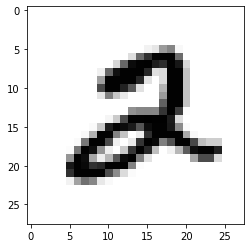

In [5]:
#Plot an image to see what it looks like
plt.figure()
plt.imshow(train_images[5], cmap=plt.cm.binary)
plt.grid(False)
plt.show()

In [6]:
x = train_images[5]
print(np.max(x));
print(np.min(x));
print(train_images.dtype)


255
0
uint8


In [7]:
#TODO: Modify the CNN structure for a slimer network
#Build the neuralnet model
model = models.Sequential()
model.add(layers.Conv2D(8, (3,3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))

# model = models.Sequential()
# model.add(layers.Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1), padding='valid'))
# model.add(layers.Conv2D(32, (5,5), activation='relu', padding='valid'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(10, activation='softmax'))

In [8]:
#Review the overall model structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [9]:
#Reshape the image so it can train in batch (and fit the model's input shape)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
#Training the model
#Hint: change optimizer to 'sgd', and increase epochs if result is bad.
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

In [ ]:
# TODO - why does loading in bmp images here lead to incorrect predictions?
correct_pred = 0
for i in range(0, 10):
  im = Image.open("/num%d.bmp" % i).convert('L')
  x = np.array(im).astype(np.uint8)
  # print(np.amax(x))
  # print(np.amin(x))
  x = 255 - x
  x = x.reshape(28, 28)
  x = np.flipud(x)
  # plt.imshow(x, cmap=plt.cm.binary)
  # plt.show()
  x = x.reshape(1,28, 28, 1)
  if i == np.argmax(model.predict(x, batch_size=1)[0]):
    correct_pred += 1
  # print(model.predict(x)[0])
for i in range(0, 10):
  im = Image.open("/num%d_t.bmp" % i).convert('L')
  x = np.array(im).astype(np.uint8)
  # print(np.amax(x))
  # print(np.amin(x))
  x = 255 - x
  x = x.reshape(28, 28)
  x = np.flipud(x)
  # plt.imshow(x, cmap=plt.cm.binary)
  # plt.show()
  x = x.reshape(1,28, 28, 1)
  if i == np.argmax(model.predict(x, batch_size=1)[0]):
    correct_pred += 1
  # print(model.predict(x)[0])
print(correct_pred)

14


In [11]:
#Evaluate the performance with testing dataset
print("Accuracy of this model is:")
model.evaluate(test_images, test_labels)


Accuracy of this model is:
313/313 [==============================] - 1s 2ms/step - loss: 0.0709 - accuracy: 0.9761


[0.07091708481311798, 0.9761000275611877]

In [12]:
#View the total number of parameters, so it doesn't overflow the LCDK's memory
print("Total amount of parameter of model is:", model.count_params())

Total amount of parameter of model is: 21578


In [13]:
model.save('mnist_classifier.h5')

In [14]:
# Convert Keras model to a tflite model
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()
tflite_model_name = 'mnist_classifier'

open(tflite_model_name + '.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpxq202vlb/assets


26464

In [ ]:
#Example for extract parameter form the first conv layer
#TODO: you need to actually modify model.layers[XXXX], this XXX to fit your actually layer number
t1, t2 = model.layers[0].get_weights()
np.savetxt('w0.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('b0.txt', t2.flatten(), delimiter=',',fmt='%.16f') 

In [ ]:
#Example for extract parameter form the second conv layer
#TODO: you need to actually modify model.layers[XXXX], this XXX to fit your actually layer number
#And do it multiple times to save all the layer with parameters
t1, t2 = model.layers[2].get_weights()
np.savetxt('w2.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('b2.txt', t2.flatten(), delimiter=',',fmt='%.16f') 

In [ ]:
t1, t2 = model.layers[4].get_weights()
np.savetxt('w4.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('b4.txt', t2.flatten(), delimiter=',',fmt='%.16f') 

In [ ]:
t1, t2 = model.layers[6].get_weights()
np.savetxt('w6.txt', t1.flatten(), delimiter=',',fmt='%.16f') 
np.savetxt('b6.txt', t2.flatten(), delimiter=',',fmt='%.16f') 